<br>

# <p style="font-size:300%;text-align:center;color:#696969;">SMART DEVICES</p>
### <p style="font-size:150%;text-align:center;color:#9A9A9A;">Reviews Text Analysis</p>

<br>

<img src=https://invest.lebijou.com/wp-content/uploads/2018/06/smart-home-1380x524-opt.png>

#### Business case: We are a tech company that manufactures Smart Home devices. This year we have released 3 new products and we want to see how well each one of them performed. We are going to analyse reviews of our customers. Reviews was scraped from [Amazon.com](https://www.amazon.com/gp/browse.html?node=6563140011&ref_=nav_em_amazon_smart_home_0_2_7_2).

<br>

### <p style="font-size:150%;color:#696969;">Products description</p>

| Smart Camera | Smart Lock | Smart Thermostat     |
| :----------- | :----------- | :------------- 
| <img src= https://m.media-amazon.com/images/I/61Jqml2u9qL._AC_SL1500_.jpg width="150" height="70">| <img src= https://m.media-amazon.com/images/I/71ad5XOAzTS._AC_SL1500_.jpg width="200" height="100">| <img src= https://m.media-amazon.com/images/I/31t8hfoDhoL._AC_SL1000_.jpg width="200" height="100"> |
|Wyze Cam records video when motion or sound is detected and sends an alert straight to your phone. An all-new Starlight Sensor records night time video in full, vivid color.| Forget key copying. Quickly and easily share permanent, scheduled or temporary access to your home with friends, family and other people you trust, and never put a key under the doormat again.| Certified thermostats save an average of $50 on yearly energy bills. Link the Amazon Smart Thermostat to an Alexa-enabled device at home, and you can control your HVAC system with your voice.|

<br>
<br>

### <p style="font-size:150%;color:#696969;">Table of content</p>
[1.  IMPORTING LIBRARIES](#1)
    
[2.  LOADING DATA](#2)
    
[3.  CREATING FEATURES](#3)
-  [polarity](#4)
-  [subjectivity](#5)
-  [text length](#6)
    
[4.  EXPLORATORY DATA  ANALYSIS](#7)  
-  [Polarity analysis](#8)
-  [Sentiment analysis](#9)
-  [Ratings analysis](#10)
-  [Correlation analysis](#11)
-  [Items comparison](#12)
    
[5.  WORDCLOUD](#13) 
      
[6.  CONCLUSION](#14)


<a id="1"></a>
# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re
import plotly.express as px
import plotly.io as pio

In [2]:
pio.templates.default = "ggplot2"
pd.options.display.float_format = '{:,.2f}'.format
pio.renderers.default = "svg"

In [3]:
pd.options.display.max_colwidth = None

<a id="2"></a>
# Loading data

In [4]:
item_1 = pd.read_csv("Data - item1.csv")
item_2 = pd.read_csv("Data - item2.csv")
item_3 = pd.read_csv("Data - item3.csv")

In [5]:
item_1["Item"] = "lock"
item_2["Item"] = "thermostat"
item_3["Item"] = "camera"

In [6]:
merged = item_1.append(item_2, ignore_index=True).append(item_3, ignore_index=True)

<a id="3"></a>
# Creating features

<a id="4"></a>
### Polarity

In [7]:
polarity = []

for i in merged["Text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
        
merged["Polarity"] = polarity

In [8]:
def sentiment(polarity):
    if polarity > 0.1:
        return "positive"
    elif polarity >= 0:
        return "neutral"
    else:
        return "negative"

In [9]:
merged["Sentiment"] = merged["Polarity"].apply(sentiment)

<a id="5"></a>
### Subjectivity

In [10]:
subjectivity = []

for i in merged["Text"]:
    try:
        subjectivity.append(TextBlob(i).sentiment.subjectivity)
    except:
        subjectivity.append(0)
        
merged["Subjectivity"] = subjectivity

In [11]:
def subj_obj(subjectivity):
    if subjectivity > 0.6:
        return "subjective"
    elif subjectivity > 0.4:
        return "normal"
    else:
        return "objective"

In [12]:
merged["Subj_Obj"] = merged["Subjectivity"].apply(subj_obj)

<a id="6"></a>
### Text length

In [13]:
def calc_len(text):
    try:
        return (len(text.split(' ')))
    except:
        return 0
merged['Text_length']=merged['Text'].apply(calc_len)

<a id="7"></a>
# Exploratory data analysis

In [14]:
viz = merged.copy()

In [15]:
# How looks our dataframe with created features
viz.head(1)

,Rating,Title,Text,Item,Polarity,Sentiment,Subjectivity,Subj_Obj,Text_length
0,4.00,Pretty Solid Smart Lock,"— Installation —I had a old Baldwin deadbolt that wasn’t compatible out of the box. Perhaps August customer support could have helped me out with a different adaptor, but I just went ahead a purchased a new deadbolt instead.As a result I had to enlarge the hole in my door somewhat & adjust the strike plate. Hopefully, your deadbolt will be compatible (the August site has a list of ones that are), so you won’t need to swap out deadbolts as I did.The installation after that was easy. However, getting it calibrated took a bit of trial and error, but after almost giving up, I finally succeeded.— Look & Feel —The lock itself is a nice peace of hardware & is now small enough where it doesn’t look so ungainly.I also purchased the keypad. It seems to work fine, but is not the most elegant thing.— HomeKit —As other reviews have noted, the lock only works over Bluetooth with HomeKit and not via WiFiHowever, the August app works over WiFi, such as when you are at home on your WiFi network or away and on a cellular network (or any internet connection). Go figure!?Hopefully, this is a bug that August will sort out as it doesn’t make any sense.— Overall —4 stars due to the calibration hassle & HomeKit weirdness.Otherwise a solid piece of hardware that lets you go key free with the flexibility to assign multiple users to the lock including guests.Edit 2020-06-12: I edited the HomeKit portion to be more clear on the WiFi limitations.",lock,0.14,positive,0.55,normal,259


<a id="8"></a>
## Polarity analysis
<br>
-1 : highly negative sentiment

+1 : highly positive sentiment

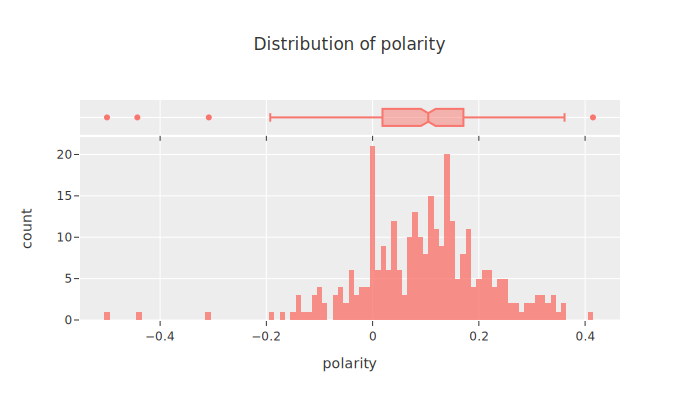

In [17]:
pol = px.histogram(x=viz.Polarity,
                   opacity=0.8,
                   labels = {"x": "polarity"},
                   title="Distribution of polarity",
                   width=700,
                   height=400,
                   nbins=100,
                   marginal="box")

pol.show()

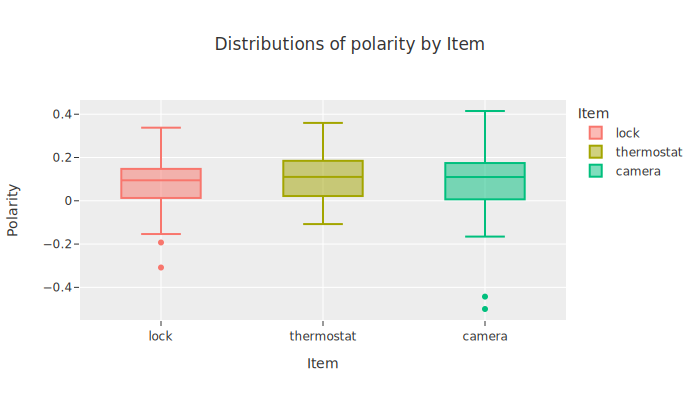

In [18]:
pol2 = px.box(data_frame=viz,
              x="Item",
              y="Polarity",
              color="Item",
              title="Distributions of polarity by Item",
              width=700,
              height=400)
pol2.show()

**Insights:**
- 50% of all reviews have polarity between 0.02 and 0.17 which is on the positive side of the scale
- Specific items have roughly same range of polarities
- Smart camera have larger variation in polarities
- We have some outlier reviews with negative sentiment

<a id="9"></a>
## Sentiment analysis

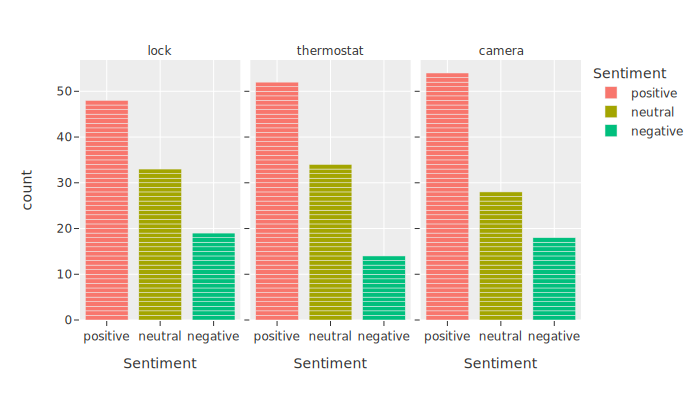

In [19]:
sent = px.bar(data_frame=viz,
              x="Sentiment",
              color="Sentiment",
              facet_col="Item",
              #title="Sentiment",
              width=700,
              height=400)
sent.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
sent.show()

In [20]:
group1 = viz.groupby(["Item", "Sentiment"]).Sentiment.count().unstack()
group1.style.background_gradient(cmap='Reds')

Sentiment,negative,neutral,positive
Item,,,
camera,18,28,54
lock,19,33,48
thermostat,14,34,52


**Insights:**
- Most of our reviews are positive
- Smart lock has the biggest number of negative reviews, so let' s closely investigate them. We are going to display 3 worst review for lock item

In [21]:
viz[viz.Item == "lock"].sort_values(by="Polarity", ascending=True).head(3)[["Title","Text","Subj_Obj"]]

,Title,Text,Subj_Obj
94,Consumes Batteries Very Quickly,I would have given this lock a 5 star but this thing goes through batteries like crazy. I have to locks and they each use at least one battery every 30 days. The lock that gets the most use may be less that 30 days. This may not seem to be a lot but a 12 pack of batteries cost $26. So you have a $4 plus dollars a month maintenance fee per lock. Very disappointed.,normal
15,Did not work Poor quality app and packaging (Time waste),"The lock was not able to connect with the app. There is no troubleshooting or support instructions given. The packaging and app also indicates poor quality. Packaging is hard to unpack, and app interface is very couter-intuitive. At minimum the app should have a support number if it does not work. App simply hangs and does not do anything. A poor quality product trying to act like high-tech. It just makes you waste a few hours trying to get it working. Returned.",objective
82,Waste of money,"While the lock works well, I have lots of issues waiting for auto unlock to work. I typically wind up using my key to open the door instead of it being open when I get to it.I requested a replacement but they said it's a software issue. I find hard to believe as my son has two and doesn't encounter problems which was why i bought it. I have the same phone and software version he has so i find it hard to believe it's a software issue..Also, beware as the batteries only last about 3 months and you don't want to buy locally as they are expensive. Order from Amazon, a lot cheaper considering I'll be going through 8 a year.Thoroughly frustrated and had thought of buying a second one, but won't waste a penny on another one.",normal


**Insights:**
- Negative reviews can be sometimes highly subjective. Let' s examine how subjective are our negative reviews
- 0 : highly objective
- 1 : highly subjective

In [22]:
negative = viz[viz.Sentiment == "negative"]

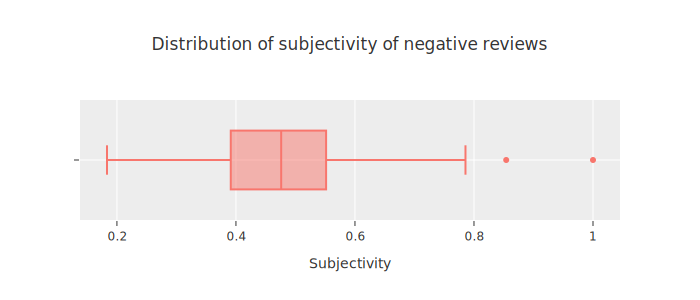

In [23]:
subj = px.box(data_frame=negative,
              x="Subjectivity",
              title="Distribution of subjectivity of negative reviews",
              width=700,
              height=300)

subj.show()

**Insights:**
- Majority of our negative reviews range between 0.39 and 0.55
- The subjectivity is somewhere in the middle. We should definitely pay close attention to negative reviews

<a id="10"></a>
## Ratings analysis

In [24]:
viz.Rating = viz.Rating.astype("string")

In [25]:
ratings = viz.groupby(["Item","Rating"]).agg(count=("Text","count")).reset_index()

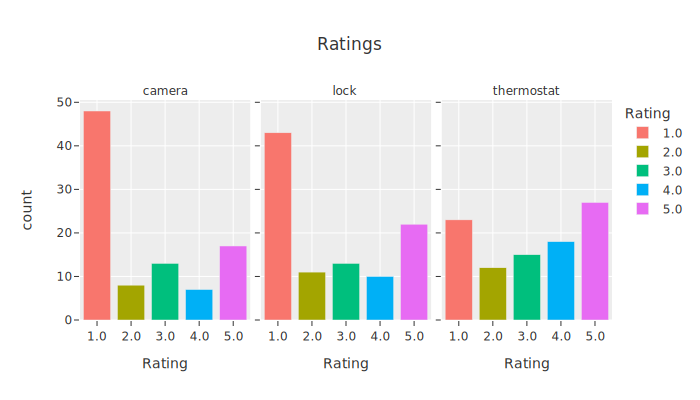

In [26]:
score = px.bar(data_frame=ratings,
                x="Rating",
                y="count",
                facet_col="Item",
                color="Rating",
                title="Ratings",
                width=700,
                height=400)
score.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
score.show()

**Insights:**
- Although our reviews are classified as mostly positive/neutral, ratings seems to be pretty low
- Let's closely examine what can be the reason reviewers gave 1.0 (lowest) 
- We pick Smart camera as it has the highest proportion of 1.0 score and highest positivity rate from previous exploration

In [27]:
bad_rating = viz[viz.Rating == "1.0"]

In [28]:
bad_rating[bad_rating.Item == "camera"].sort_values(by="Polarity", ascending=False).head(10)[["Rating","Title","Text","Polarity"]]

,Rating,Title,Text,Polarity
224,1.0,Requires a subscription service to function properly,"I was actually really happy with these cameras. Easy to understand app and setup, good video quality, pretty nifty all around. That was, until I recieved an email welcoming me to the 14 day free trial of their subscription service.One of the features of this subscription service (for this product that I already purchased) was that with it, the camera will record more than 12 seconds after movement is detected. Meaning if you don't pay for this, you better hope your home invader rapist/burglar shows their face within 12 seconds of showing up! Sincerely, your friends at Wyze :)This is extortion and a scam. The security camera doesn't do the ONE thing it's supposed to for more than 12 seconds at a time. The email doesn't even say how much the subscription service costs while asking me and providing multiple links to sign up to it.Really sucks because it was good up until that one ""feature."" Now it's just a plastic piece of junk. I'm returning it immediately.",0.41
260,1.0,Glitch City,"I've had this camera set up for about a week. It has the newest firmware installed and the newest Android app being used to monitor it. I can view the video stream for 30 seconds at most before it just stops streaming video. It doesn't matter if I have it in HD, SD, or 360p streaming mode. It doesn't matter if I have a strong 4G, 5G, or wifi connection. It just freezes 100% of the time. Restarting the app restarts the stream, but then it freezes again 30 seconds later. It's inexcusable in this day and age for a company of this size to have a product performing so poorly right out of the box.",0.30
203,1.0,Cam Plus Doesn’t Work,We ordered 3 of the V3 cameras. I’ve got to say the clarity and night vision are awesome. We don’t get night vision in color though. Also when you set them up make sure you have SD cards because cam plus is an absolute JOKE. You get nothing but error codes on the event videos that make these cameras worth the money. For instance if someone was breaking into your home the camera would alert you but then it would throw up an error code that it cannot retrieve the event video from the cloud. You can still watch the person come in on the cam if you know that is what is happening. I had faith in Wyze but we are so frustrated with not being able to see the event videos that we want to return them,0.30
229,1.0,Great the first night-stopped working the 2nd night,"We used it as a monitor in our daughter’s room. The camera worked really well the first night. We were very impressed with the quality of images. The next night when I turned it on, there was a message that there is a firmware update. I tried doing the firmware update and it tried updating all night and it just kept updating and never stopped (after 8 hours). I followed the troubleshooting guide and unplugged it, plugged it back in and nothing. I switched outlets and plugs as the troubleshooting directions happened and nothing. I tried deleting the camera from the app and deleting the app and reinstalling and nothing.",0.29
200,1.0,Read before you buy,"This camera quality is awesome. As far as using for security forget about it. I have 3 indoor camera that work great. I bought 2 cam v3 for outside. They are basically junk they alert you on bugs, tree blowing, lights from cars shining on trees. Unless you have a yard without anything blowing or bugs flying around then don’t bother for security. I’m talking about events happening non stop all night long. I set the security all the way down and didn’t help at all. Ive watch 50 videos with nothing in them. Day time i think is fine so hopefully if you have criminals in your neighborhood they only work during the day.",0.26
247,1.0,Would not stay connected,"Was very excited to get the new V3 since I own 2 V2's that have performed flawlessly over the past year or so. I was looking forward to the enhanced night time vision. Ordered one and got

**Insights:**
- Overall satisfaction with video quality
- Customers unsatisfied with subscription options
- Problems with retrieving the recorded video, stopping of recording
- Long updating, bad connection
- Senzors are sensitive to bugs, tree, car lights

<a id="11"></a>
## Correlation analysis

In [29]:
numeric = viz[["Rating", "Polarity", "Subjectivity", "Text_length"]]
numeric.Rating = numeric.Rating.astype("float")

C:\Program Files (x86)\Development tools\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
cor_matrix = numeric.corr()

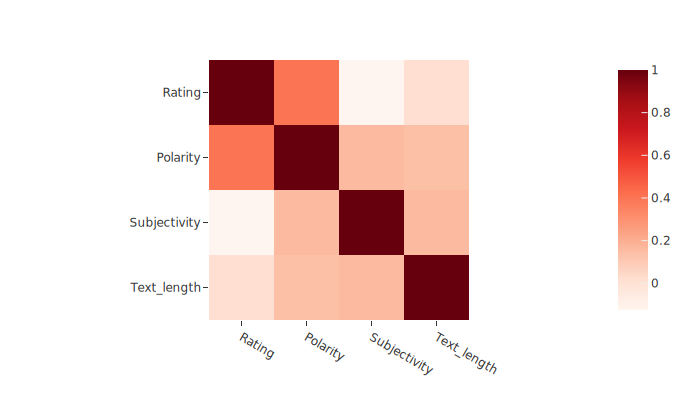

In [31]:
cor = px.imshow(cor_matrix,
                color_continuous_scale='Reds',
                width=700,
                height=400)
cor.show()

**Insights:**
- Rating and Polarity are positively correlated, the higher Rating implies higher Polarity
- Sentiment or Rating doesn't effect the length of the text
- Rating and Subjectivity are slightly negatively correlated, which indicates that low ratings are more subjective

<a id="12"></a>
## Items comparison

In [32]:
items = viz.copy()
items.Rating = items.Rating.astype("float")

In [33]:
items = items.groupby("Item").agg({"Rating":["mean"],
                                   "Polarity":["median"],
                                   "Subjectivity":["median"],
                                   })
items = items.droplevel(-1, axis=1)

In [34]:
items = items.stack().reset_index().rename(columns={"level_1":"Measure", 0:"Value"})

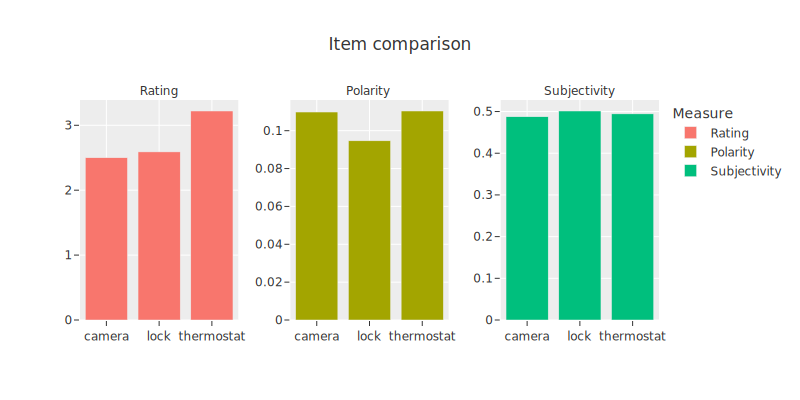

In [35]:
item = px.bar(data_frame=items,
              x="Item",
              y="Value",
              color="Measure",
              facet_col="Measure",
              facet_col_spacing=0.09,
              labels={"Value":"", "Item":""},
              title="Item comparison",
              width=800,
              height=400
             )
item.update_yaxes(matches=None)
item.update_yaxes(showticklabels=True)
item.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
item.show()

**Insights:**
- Smart thermostat scored the best in our reviews
- Other smart devices also performed well, although we should focus on further improvement in setup and connection to application and fixing the bugs, so the reviews are higher as well

<a id="13"></a>
# Wordcloud

In [36]:
cloud = merged.copy()
cloud[cloud.Text.isnull()] = " "
stopwords=set(STOPWORDS)

total_title= (' '.join(cloud["Title"]))
# match all strings that contain a non-letter
total_title=re.sub('[^a-zA-Z]',' ',total_title)
# remove key words
total_title=re.sub('(camera|lock|thermostat)', ' ',total_title)
# remove single letters
total_title=re.sub('( r | s | v )', ' ',total_title)
# remove extra spaces
total_title=re.sub(' +',' ',total_title)

(-0.5, 699.5, 399.5, -0.5)

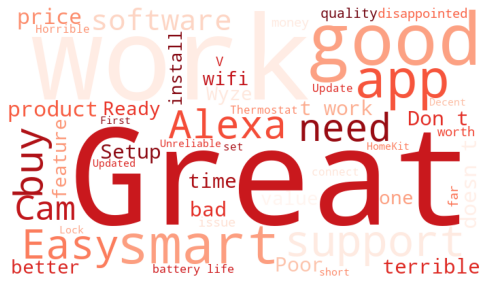

In [37]:
wordcloud = WordCloud(width = 700, 
                      height = 400,
                      stopwords=stopwords,
                      background_color="white", 
                      colormap="Reds",
                      max_font_size=200,
                      max_words=50).generate(total_title)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [38]:
words_seo = wordcloud.words_
wordcloud_seo = pd.DataFrame(words_seo, index=["frequency"]).T.head(20)
wordcloud_seo.style.background_gradient(cmap='Reds')

,frequency
Great,1.000000
work,0.722222
good,0.666667
smart,0.444444
app,0.416667
support,0.416667
Easy,0.361111
buy,0.333333
Alexa,0.333333
need,0.305556


In [39]:
'''

from collections import Counter
mostcommon = pd.DataFrame(Counter(words).most_common(20)) !!without stopwords

'''

'\n\nfrom collections import Counter\nmostcommon = pd.DataFrame(Counter(words).most_common(20)) !!without stopwords\n\n'

**Insights:**
- We can see list of words that occured most in the titles of reviews
- We got closer look at the sentiment of words customers use to describe their experience with the product
- This insight can be used in Keyword SEO for descriptions of items on our website

<a id="14"></a>
# Conclusion

- We can conclude that majority od our reviews are positive
- Reviews of some devices such as Smart camera vary. We got some pretty good reviews on video quality, although we spotted places for further improvement in setup and connection of device, sensitivity of sensors and record retrieval
- Negative reviews and Low ratings tend to be slightly subjective, but we should pay close attention to them anyway
- Smart thermostat performed best from our released devices this year
- We can use the words customers used the most in their reviews for further SEO

<img src=https://christopherstrobel.de/wp-content/uploads/sites/374/das-internet-der-dinge-im-smart-home-1-e1459248280315.jpg>

<center>© 2022 Miroslava Ježíková</center>